Genre classification using a random forest algorithm

1.Importing the required module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

2.Data Collection

In [3]:
df = pd.read_csv(r"D:\Experiment\Codesoft\Genre Classification Dataset\train_data.txt",names=["S_no","Title","Genre","Story"],delimiter=":::")
df.set_index("S_no",inplace=True)

C:\Users\Smile\AppData\Local\Temp\ipykernel_13000\2273210309.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(r"D:\Experiment\Codesoft\Genre Classification Dataset\train_data.txt",names=["S_no","Title","Genre","Story"],delimiter=":::")


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Experiment\\Codesoft\\Genre Classification Dataset\\train_data.txt'

3.Analyzing the data

In [ ]:
df.head()

,Title,Genre,Story
S_no,,,
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
df.tail()

,Title,Genre,Story
S_no,,,
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [ ]:
df.size

162642

In [ ]:
df.shape

(54214, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   54214 non-null  object
 1   Genre   54214 non-null  object
 2   Story   54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,Title,Genre,Story
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
Category=df["Genre"].value_counts().to_dict()

In [ ]:
print("S_no Genre  Count")
n=0
for i,j in Category.items():
    print(f"{n}.{i}  {j}")
    n+=1

S_no Genre  Count
0. drama   13613
1. documentary   13096
2. comedy   7447
3. short   5073
4. horror   2204
5. thriller   1591
6. action   1315
7. western   1032
8. reality-tv   884
9. family   784
10. adventure   775
11. music   731
12. romance   672
13. sci-fi   647
14. adult   590
15. crime   505
16. animation   498
17. sport   432
18. talk-show   391
19. fantasy   323
20. mystery   319
21. musical   277
22. biography   265
23. history   243
24. game-show   194
25. news   181
26. war   132


In [ ]:
df.isnull()

,Title,Genre,Story
S_no,,,
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
54210,False,False,False
54211,False,False,False
54212,False,False,False


<Axes: ylabel='S_no'>

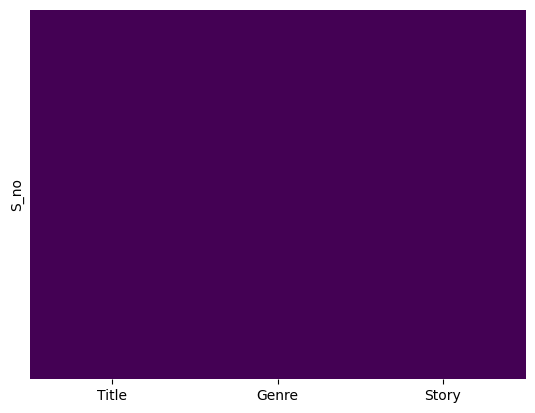

In [ ]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.isnull().sum()

Title    0
Genre    0
Story    0
dtype: int64

<Axes: xlabel='count', ylabel='Genre'>

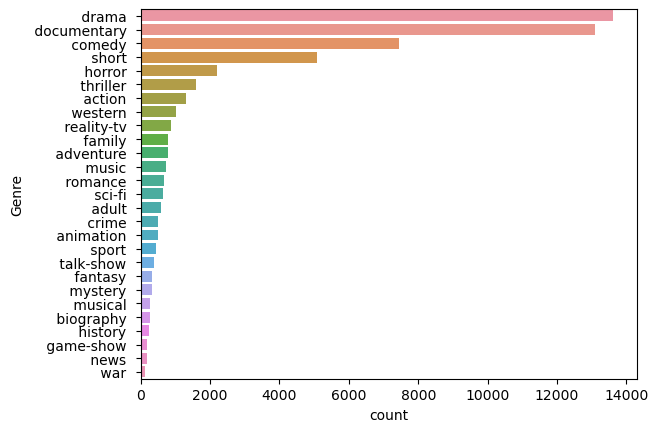

In [ ]:
sns.countplot(data=df,y="Genre",order=df['Genre'].value_counts().index)

In [ ]:
per_Drama = (13613/len(df))*100
print("Percentage of Drama =",per_Drama)
per_Docu = (13096/len(df))*100
print("Percentage of Documentary = ",per_Docu)

Percentage of Drama = 25.109750249013167
Percentage of Documentary =  24.156122034898736


Insights from Analysis: From the above visualization and analysis, we can see that the dataset is biased towards Drama and Documentary.

4.Data Pre processing

In [ ]:
#Removing numbers and other non alphabets from df['Story']

import re

def process(text):
    # Keep only alphabetic characters
    processed_text = re.sub("[^a-zA-Z]", " ", text)
    return processed_text

# Apply the process function to the 'Story' column
df['Story'] = df['Story'].apply(process)



In [ ]:
df['Story'].head()

S_no
1     Listening in to a conversation between his do...
2     A brother and sister with a past incestuous r...
3     As the bus empties the students for their fie...
4     To help their unemployed father make ends mee...
5     The film s title refers not only to the un re...
Name: Story, dtype: object

In [ ]:
#spliting the data

X_train,X_test,y_train,y_test = train_test_split(df['Story'],df['Genre'],random_state=42)

5.Choosing the model

In [ ]:
#We are using random forest

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))  # Adjust parameters based on your dataset
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Machine Learning Pipeline with RandomForestClassifier
model = make_pipeline(TfidfVectorizer(max_features=10000, ngram_range=(1, 2)), RandomForestClassifier(random_state=42))

# Defining hyperparameters for the grid search
parameters = {
    'randomforestclassifier__n_estimators': [50, 100, 150],
    'randomforestclassifier__max_depth': [10, 20, 30],
    'tfidfvectorizer__max_features': [10000, 20000, None],
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)]  # Experimenting with n-gram range
}

# Setting up GridSearchCV
grid_search = GridSearchCV(model, parameters, cv=3, scoring='f1_weighted',n_jobs=11)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=11,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'tfidfvectorizer__max_features': [5000, 10000, None]},
             scoring='f1_weighted')

In [ ]:
#finding the model with best hyper parameter 
best_model = grid_search.best_estimator_
labels = best_model.predict(X_test)

In [ ]:

precision = precision_score(y_test, labels, average='weighted')
recall = recall_score(y_test, labels, average='weighted')
f1 = f1_score(y_test, labels, average='weighted')
acc = accuracy_score(y_test, labels)

print("Best Hyperparameters:", grid_search.best_params_)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)

Best Hyperparameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 50, 'tfidfvectorizer__max_features': 5000}
Precision: 46.3060614607741
Recall: 46.87177217057695
F1 Score: 36.983097328012576


c:\Users\Smile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predicted = best_model.predict(test_df['Story'])
predicted = predicted.astype(object)

In [ ]:
precision = precision_score(test_df["Genre"],predicted, average='weighted') 
recall = recall_score(test_df["Genre"],predicted,  average='weighted')
f1 = f1_score(test_df["Genre"],predicted, average='weighted')
acc = accuracy_score(test_df["Genre"], predicted)

c:\Users\Smile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("precision = " ,np.mean(precision)*100)
print("recall = ",np.mean(recall)*100)
print("f1 = ",np.mean(f1)*100)
print("Accuracy = ",acc*100)

precision =  52.91941162237872
recall =  46.56088560885609
f1 =  36.90376423202883
Accuracy =  46.56088560885609
